
## Observations and Insights 


 
1.	We can say that Capomulin and Ramicane are the most effective drugs, as we can see in our boxplot, Capomulin – positive distribution and Ramicane – normal distribution. 

2.	The median lines of each box plot (Capomulin and Ramicane) lie inside of each box, so the difference between them is lightly. 

3.	Since our Capomulin boxplot is the smallest, we can conclude that the data is less dispersed than the data of the other drugs.  

4.	The line plot shows the effectiveness of Capomulin drug, since the tumor volume of all mouses decrease. I tried with many mice and all show that tendency. 

5.	Our linear regression shows that the weight and the average tumor volume are not retaliated, even we have a positive relationship, but the scatters are very dispersed, so they don’t show an increasing relationship. 

6.	Finally, Capomulin is the most effectiveness drug from all 10. 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path, low_memory=False)
study_results = pd.read_csv(study_results_path, low_memory=False)

In [2]:
# Combine the data into a single dataset ######## I used "outer" in orther 
mice_treatments_scc = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
mice_treatments_scc

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.  # 249 mice #

total_mice = mice_treatments_scc["Mouse ID"].value_counts()
total_mice

g989    13
r604    10
i557    10
d251    10
q787    10
        ..
x226     1
d133     1
n482     1
f932     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [4]:
# 249 mice #
total_mice_num = mice_treatments_scc["Mouse ID"].nunique()
total_mice_num

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
                                                    
mouseid_timepont_df = pd.DataFrame(mice_treatments_scc)
mouseid_timepont_df[["Mouse ID", "Timepoint"]]
removed_dupli = mouseid_timepont_df.drop_duplicates()

In [6]:
 # Our len was 1893 after drop the duplicated raw we have 1892
    
len(removed_dupli["Mouse ID"])

1892

In [7]:
removed_dupli.count()

Mouse ID              1892
Drug Regimen          1892
Sex                   1892
Age_months            1892
Weight (g)            1892
Timepoint             1892
Tumor Volume (mm3)    1892
Metastatic Sites      1892
dtype: int64

In [8]:
# We can noticed that the Mouse ID that was duplicated was g989, since we had at firts 13 and now we have 12.

         # MOUSE ID DROP g989
    
mice_after_drop = removed_dupli["Mouse ID"].value_counts()
mice_after_drop

g989    12
r604    10
i557    10
d251    10
q787    10
        ..
x226     1
d133     1
n482     1
f932     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [9]:
# Optional: Get all the data for the duplicate mouse ID. 


In [10]:
df_whole_info = removed_dupli.set_index("Mouse ID")
df_whole_info.nunique()

Drug Regimen            10
Sex                      2
Age_months              24
Weight (g)              16
Timepoint               10
Tumor Volume (mm3)    1644
Metastatic Sites         5
dtype: int64

In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseID_df = pd.DataFrame(removed_dupli)
clean_mouseID_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.

        # We still having the same number of mice 249, since we had a duplicated Mouse ID row, not a mouse. 
    
total_mice_clean = clean_mouseID_df["Mouse ID"].nunique()
total_mice_clean

249

In [13]:
regimen_group = clean_mouseID_df.groupby("Drug Regimen")
sem_tumor = regimen_group["Tumor Volume (mm3)"].sem()
sem_tumor


Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.514041
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume 
#for each regimen

regimen_group = clean_mouseID_df.groupby("Drug Regimen")

mean_tumor = regimen_group["Tumor Volume (mm3)"].mean()
median_tumor = regimen_group["Tumor Volume (mm3)"].median()
variance_tumor = regimen_group["Tumor Volume (mm3)"].var()
st_deviation_tumor = regimen_group["Tumor Volume (mm3)"].std()
sem_tumor = regimen_group["Tumor Volume (mm3)"].sem()

summary_regimen_group = pd.DataFrame({
    "Mean":mean_tumor,
    "Median":median_tumor,
    "Variance":variance_tumor,
    "Standar Deviation":st_deviation_tumor,
    "SEM":sem_tumor
})
summary_regimen_group

,Mean,Median,Variance,Standar Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
regimen_group_agg = clean_mouseID_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_group_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

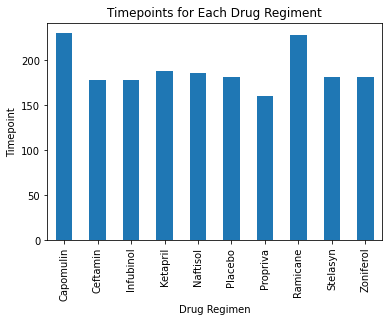

<Figure size 432x288 with 0 Axes>

In [50]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_group = clean_mouseID_df.groupby("Drug Regimen")
timepoints_data = regimen_group["Timepoint"].count()
totals_plot = timepoints_data.plot(kind="bar", title="Timepoints for Each Drug Regiment")

totals_plot.set_xlabel("Drug Regimen")
totals_plot.set_ylabel("Timepoint")

plt.show()
plt.tight_layout()

<function matplotlib.pyplot.show(close=None, block=None)>

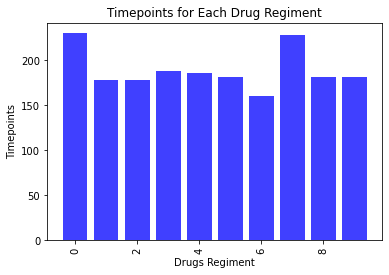

In [51]:
total_drugs =clean_mouseID_df["Drug Regimen"].value_counts()
x_axis= np.arange(len(total_drugs))

plt.bar(x_axis, timepoints_data, color='blue', alpha=0.75, align="center")
plt.title("Timepoints for Each Drug Regiment")
plt.xlabel("Drugs Regiment")
plt.ylabel("Timepoints")
plt.xticks(rotation= "vertical")

plt.show

In [23]:
total_drugs

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     160
Name: Drug Regimen, dtype: int64

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_group = clean_mouseID_df.groupby("Sex")
male_female = sex_group["Mouse ID"].nunique()
male_female

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

In [25]:
sex = ["Male", "Female"]
numbers = [125,124]
colors = ["lightskyblue", "lightcoral"]
explode= (0, 0.1)

<function matplotlib.pyplot.show(close=None, block=None)>

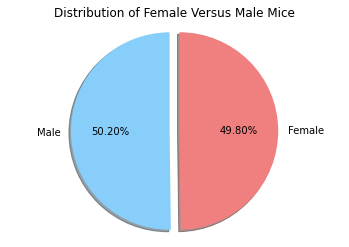

In [26]:
plt.title("Distribution of Female Versus Male Mice")
plt.pie(numbers, explode=explode, labels=sex, colors=colors, autopct="%1.2f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show

In [27]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["lightskyblue", "lightcoral"]
explode = (0, 0.05)


<function matplotlib.pyplot.show(close=None, block=None)>

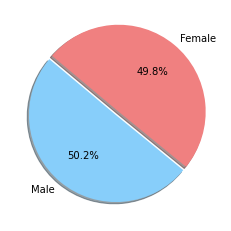

In [28]:
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show

## Quartiles, Outliers and Boxplots

In [29]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint = clean_mouseID_df.groupby("Mouse ID")["Timepoint"].max().reset_index()
greatest_timepoint_df = pd.DataFrame(greatest_timepoint)
greatest_timepoint_df


,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
244,z435,10
245,z578,45
246,z581,45
247,z795,45


In [30]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
combine_to_get_tumor = pd.merge(clean_mouseID_df, greatest_timepoint_df, how= "right", on=("Mouse ID", "Timepoint"))
combine_to_get_tumor.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
5,a401,Zoniferol,Female,8,25,45,66.794156,4
6,a411,Ramicane,Male,3,22,45,38.407618,1
7,a444,Ramicane,Female,10,25,45,43.047543,0
8,a457,Ketapril,Female,11,30,10,49.783419,0
9,a492,Stelasyn,Male,20,25,45,60.122011,1


In [31]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drugs_reg = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


drug_Capomulin = []
drug_Ramicane = []
drug_Infubinol = []
drug_Ceftamin = []

for index, row in combine_to_get_tumor.iterrows():
    
    if row[1]== "Capomulin":
        drug_Capomulin.append(row[6])
    if row[1]== drugs_reg[1]:
        drug_Ramicane.append(row[6])
    if row[1]== drugs_reg[2]:
        drug_Infubinol.append(row[6])
    if row[1]== drugs_reg[3]:
        drug_Ceftamin.append(row[6])
                    
drugs_reg_df = pd.DataFrame({
    "Capomulin":drug_Capomulin,
    "Ramicane": drug_Ramicane,
    "Infubinol": drug_Infubinol,
    "Ceftamin": drug_Ceftamin
})   
drugs_reg_df.head() 

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [32]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# IQR = Q3-Q1

#Capomulin
quartiles = drugs_reg_df[drugs_reg[0]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medianq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower drug is: {lowerq}")
print(f"The upper quartile of drug is: {upperq}")
print(f"The interquartile range of drug is: {iqr}")
print(f"The the median of drug is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds   

The lower drug is: 32.37735684
The upper quartile of drug is: 40.1592203
The interquartile range of drug is: 7.781863460000004
The the median of drug is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [33]:
# Ramicane

quartiles = drugs_reg_df[drugs_reg[1]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medianq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower drug is: {lowerq}")
print(f"The upper quartile of drug is: {upperq}")
print(f"The interquartile range of drug is: {iqr}")
print(f"The the median of drug is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower drug is: 31.56046955
The upper quartile of drug is: 40.65900627
The interquartile range of drug is: 9.098536719999998
The the median of drug is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [34]:
# Infubinol

quartiles = drugs_reg_df[drugs_reg[2]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medianq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower drug is: {lowerq}")
print(f"The upper quartile of drug is: {upperq}")
print(f"The interquartile range of drug is: {iqr}")
print(f"The the median of drug is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower drug is: 54.04860769
The upper quartile of drug is: 65.52574285
The interquartile range of drug is: 11.477135160000003
The the median of drug is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [35]:
# Ceftamin

quartiles = drugs_reg_df[drugs_reg[3]].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
medianq = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower drug is: {lowerq}")
print(f"The upper quartile of drug is: {upperq}")
print(f"The interquartile range of drug is: {iqr}")
print(f"The the median of drug is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower drug is: 48.72207785
The upper quartile of drug is: 64.29983003
The interquartile range of drug is: 15.577752179999997
The the median of drug is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


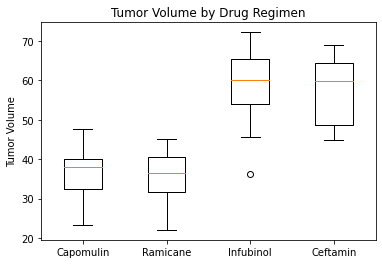

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume by Drug Regimen')
ax1.set_ylabel('Tumor Volume')
ax1.boxplot(drugs_reg_df)
plt.xticks([1, 2, 3, 4],["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

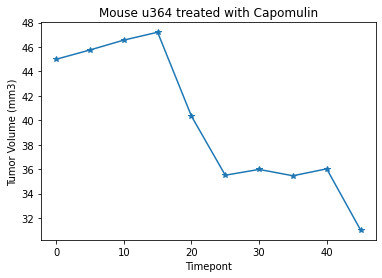

In [37]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_treared = clean_mouseID_df.loc[clean_mouseID_df["Mouse ID"] == "u364"]

plt.plot(mouse_treared["Timepoint"], mouse_treared["Tumor Volume (mm3)"], marker = "*")


plt.title("Mouse u364 treated with Capomulin")
plt.xlabel("Timepont")
plt.ylabel("Tumor Volume (mm3)")

plt.show()


In [38]:
mouse_treared

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2
99,u364,Capomulin,Male,18,17,20,40.343948,2
100,u364,Capomulin,Male,18,17,25,35.503616,2
101,u364,Capomulin,Male,18,17,30,35.978334,2
102,u364,Capomulin,Male,18,17,35,35.459490,2
103,u364,Capomulin,Male,18,17,40,36.024138,2
104,u364,Capomulin,Male,18,17,45,31.023923,3


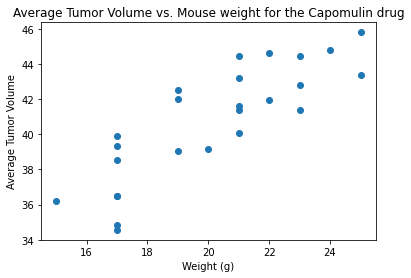

In [47]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_treared = clean_mouseID_df.loc[clean_mouseID_df["Drug Regimen"] == "Capomulin",:]

drug_c_group = capomulin_treared.groupby(["Mouse ID"]).mean()
                                         
plt.scatter(drug_c_group["Weight (g)"], drug_c_group["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse weight for the Capomulin drug")
plt.show()

## Correlation and Regression

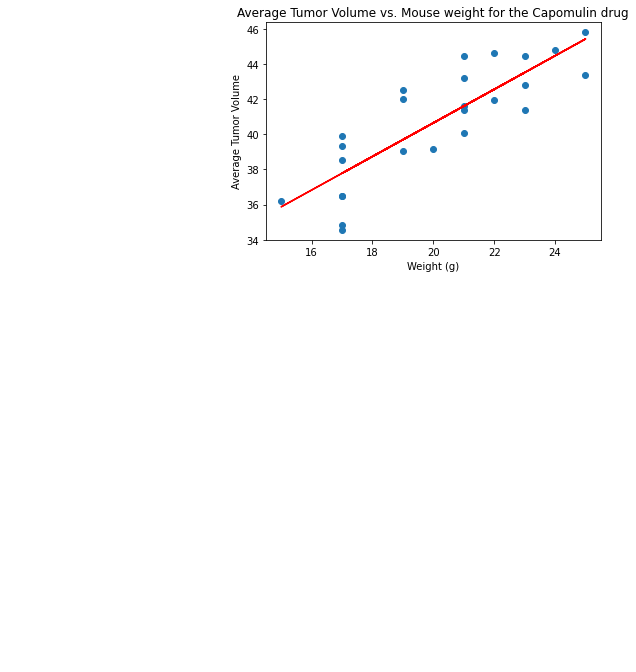

In [48]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x_values = drug_c_group["Weight (g)"]
y_values = drug_c_group["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
plt.title("Average Tumor Volume vs. Mouse weight for the Capomulin drug")

plt.show()